Customer Churn Analysis

Cell 1: Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Cell 2: Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name=1)

# Basic dataset overview
print("Customer Churn Analysis")
print("=" * 30)
print(f"Data source: E-commerce customer dataset")
print(f"Analysis period: Historical customer behavior data")
print(f"Business context: Customer retention analysis")
print(f"\nDataset size: {len(df):,} customers")
print(f"Number of features: {df.shape[1]}")
print(f"Features available: {list(df.columns)}")
print(f"Dataset shape: {df.shape}")

# Display first few rows
df.head()

Customer Churn Analysis
Data source: E-commerce customer dataset
Analysis period: Historical customer behavior data
Business context: Customer retention analysis

Dataset size: 5,630 customers
Number of features: 20
Features available: ['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Dataset shape: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
import pandas as pd

df = pd.read_excel("E Commerce Dataset.xlsx", sheet_name=1)  # try 1st data sheet
print(df.head())
print(df.columns.tolist())


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

Cell 3: Data Quality Assessment

In [3]:
# Check data quality
missing_data = df.isnull().sum()
data_types = df.dtypes

print("Data Quality Assessment:")
print("-" * 25)

if missing_data.any():
    print("Missing values found:")
    for col, count in missing_data[missing_data > 0].items():
        print(f"  {col}: {count} ({count/len(df)*100:.1f}%)")
else:
    print("No missing values detected")

print(f"\nData types:")
for dtype_name, count in data_types.value_counts().items():
    print(f"  {dtype_name}: {count} columns")

# Basic statistics
df.describe()

Data Quality Assessment:
-------------------------
Missing values found:
  Tenure: 264 (4.7%)
  WarehouseToHome: 251 (4.5%)
  HourSpendOnApp: 255 (4.5%)
  OrderAmountHikeFromlastYear: 265 (4.7%)
  CouponUsed: 256 (4.5%)
  OrderCount: 258 (4.6%)
  DaySinceLastOrder: 307 (5.5%)

Data types:
  float64: 8 columns
  int64: 7 columns
  object: 5 columns


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Cell 4: Target Variable Definition and Analysis

In [4]:
# Define target variable
if 'Churn' in df.columns:
    df['target'] = df['Churn']
    print("Using existing 'Churn' column as target")
else:
    # Simple business rule if no churn column exists
    df['target'] = (df['SatisfactionScore'] <= 2).astype(int)
    print("Created target using SatisfactionScore <= 2 (low satisfaction proxy)")

# Analyze target distribution
churn_rate = df['target'].mean()
churn_counts = df['target'].value_counts()

print(f"\nTarget Variable Analysis:")
print(f"Overall churn rate: {churn_rate:.2%}")
print(f"Retained customers: {churn_counts[0]:,} ({churn_counts[0]/len(df)*100:.1f}%)")
print(f"Churned customers: {churn_counts[1]:,} ({churn_counts[1]/len(df)*100:.1f}%)")

# Check for severe imbalance
if churn_rate < 0.05 or churn_rate > 0.95:
    print("⚠️ Warning: Highly imbalanced dataset - consider sampling techniques")

Using existing 'Churn' column as target

Target Variable Analysis:
Overall churn rate: 16.84%
Retained customers: 4,682 (83.2%)
Churned customers: 948 (16.8%)


Cell 5: Feature Selection and Preparation

In [5]:

# Select business-relevant features
potential_features = [
    'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 
    'OrderCount', 'Tenure', 'CashbackAmount'
]

# Check which features are available
available_features = [f for f in potential_features if f in df.columns]
print(f"Feature Selection:")
print(f"Available features ({len(available_features)}): {available_features}")

if len(available_features) < 3:
    print("⚠️ Warning: Limited features available for analysis")

# Prepare feature matrix
X = df[available_features].copy()
y = df['target']

# Handle missing values if any
missing_counts = X.isnull().sum()
if missing_counts.any():
    print(f"\nHandling missing values:")
    for col, count in missing_counts[missing_counts > 0].items():
        print(f"  {col}: {count} missing values (filled with median)")
    X = X.fillna(X.median())

print(f"\nFinal feature matrix shape: {X.shape}")

Feature Selection:
Available features (6): ['SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'OrderCount', 'Tenure', 'CashbackAmount']

Handling missing values:
  DaySinceLastOrder: 307 missing values (filled with median)
  OrderCount: 258 missing values (filled with median)
  Tenure: 264 missing values (filled with median)

Final feature matrix shape: (5630, 6)


Cell 6: Train-Test Split and Data Preparation

In [6]:

# Split data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Split Summary:")
print("-" * 18)
print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")
print(f"Train churn rate: {y_train.mean():.2%}")
print(f"Test churn rate: {y_test.mean():.2%}")

# Display feature statistics
print(f"\nFeature Statistics (Training Set):")
X_train.describe().round(2)

Data Split Summary:
------------------
Training set: 4,504 samples
Test set: 1,126 samples
Train churn rate: 16.83%
Test churn rate: 16.87%

Feature Statistics (Training Set):


,SatisfactionScore,Complain,DaySinceLastOrder,OrderCount,Tenure,CashbackAmount
count,4504.00,4504.00,4504.00,4504.00,4504.00,4504.00
mean,3.07,0.28,4.46,2.92,10.13,177.39
std,1.38,0.45,3.55,2.82,8.35,49.10
min,1.00,0.00,0.00,1.00,0.00,0.00
25%,2.00,0.00,2.00,1.00,3.00,145.88
50%,3.00,0.00,3.00,2.00,9.00,163.76
75%,4.00,1.00,7.00,3.00,15.00,197.14
max,5.00,1.00,46.00,16.00,61.00,324.99


Cell 7: Model Training and Cross-Validation

In [7]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Model Training and Validation:")
print("-" * 30)

# Perform cross-validation for reliable performance estimate
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print(f"5-Fold Cross-Validation Results:")
print(f"  Mean AUC: {cv_scores.mean():.3f}")
print(f"  Std AUC: {cv_scores.std():.3f}")
print(f"  Individual scores: {[f'{score:.3f}' for score in cv_scores]}")

# Performance interpretation
mean_auc = cv_scores.mean()
if mean_auc >= 0.80:
    performance = "Strong predictive ability"
elif mean_auc >= 0.70:
    performance = "Good predictive ability"
elif mean_auc >= 0.60:
    performance = "Moderate predictive ability"
else:
    performance = "Limited predictive ability"

print(f"  Interpretation: {performance}")

Model Training and Validation:
------------------------------
5-Fold Cross-Validation Results:
  Mean AUC: 0.948
  Std AUC: 0.011
  Individual scores: ['0.965', '0.946', '0.954', '0.937', '0.938']
  Interpretation: Strong predictive ability


Cell 8: Final Model Evaluation

In [8]:
# Train final model and evaluate on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate test performance
test_auc = roc_auc_score(y_test, y_prob)

print("Final Model Performance:")
print("-" * 25)
print(f"Test AUC: {test_auc:.3f}")

# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Retained', 'Churned']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(f"                Predicted")
print(f"Actual    Retained  Churned")
print(f"Retained     {cm[0,0]:4d}     {cm[0,1]:4d}")
print(f"Churned      {cm[1,0]:4d}     {cm[1,1]:4d}")

# Business impact interpretation of errors
print(f"\nBusiness Impact of Prediction Errors:")
print(f"False Positives (predicted churn, actually retained): {cm[0,1]} customers")
print(f"  → Risk: Unnecessary retention spending on loyal customers")
print(f"False Negatives (predicted retained, actually churned): {cm[1,0]} customers")
print(f"  → Risk: Lost revenue from customers we could have retained")
print(f"Note: Business should determine relative cost of each error type")


Final Model Performance:
-------------------------
Test AUC: 0.989

Classification Report:
              precision    recall  f1-score   support

    Retained       0.98      0.99      0.98       936
     Churned       0.93      0.89      0.91       190

    accuracy                           0.97      1126
   macro avg       0.95      0.94      0.95      1126
weighted avg       0.97      0.97      0.97      1126


Confusion Matrix:
                Predicted
Actual    Retained  Churned
Retained      923       13
Churned        20      170

Business Impact of Prediction Errors:
False Positives (predicted churn, actually retained): 13 customers
  → Risk: Unnecessary retention spending on loyal customers
False Negatives (predicted retained, actually churned): 20 customers
  → Risk: Lost revenue from customers we could have retained
Note: Business should determine relative cost of each error type


Cell 9: Feature Importance Analysis

In [9]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance Analysis:")
print("-" * 28)
print("Rank  Feature               Importance")
print("-" * 38)
for idx, row in feature_importance.iterrows():
    rank = list(feature_importance.index).index(idx) + 1
    print(f"{rank:2d}.   {row['feature']:20} {row['importance']:.3f}")

# Identify top predictors
top_feature = feature_importance.iloc[0]['feature']
second_feature = feature_importance.iloc[1]['feature'] if len(feature_importance) > 1 else None

print(f"\nKey Insights:")
print(f"• '{top_feature}' is the strongest predictor of churn")
if second_feature:
    print(f"• '{second_feature}' is the second strongest predictor")

Feature Importance Analysis:
----------------------------
Rank  Feature               Importance
--------------------------------------
 1.   CashbackAmount       0.362
 2.   Tenure               0.306
 3.   DaySinceLastOrder    0.117
 4.   SatisfactionScore    0.078
 5.   OrderCount           0.070
 6.   Complain             0.067

Key Insights:
• 'CashbackAmount' is the strongest predictor of churn
• 'Tenure' is the second strongest predictor


Cell 10: Data-Driven Business Insights

In [10]:
print("Business Insights from Data:")
print("-" * 28)

# Satisfaction analysis
if 'SatisfactionScore' in available_features:
    print("\n1. Customer Satisfaction Impact:")
    satisfaction_analysis = df.groupby('SatisfactionScore')['target'].agg(['mean', 'count'])
    for score in sorted(df['SatisfactionScore'].unique()):
        rate = satisfaction_analysis.loc[score, 'mean']
        count = satisfaction_analysis.loc[score, 'count']
        print(f"   Score {score}: {rate:.1%} churn rate (n={count:,})")

# Complaint analysis
if 'Complain' in available_features:
    print("\n2. Complaint Impact:")
    complaint_churn_rate = df[df['Complain'] == 1]['target'].mean()
    no_complaint_churn_rate = df[df['Complain'] == 0]['target'].mean()
    print(f"   With complaints: {complaint_churn_rate:.1%} churn rate")
    print(f"   Without complaints: {no_complaint_churn_rate:.1%} churn rate")

# Recency analysis
if 'DaySinceLastOrder' in available_features:
    print("\n3. Purchase Recency Impact:")
    recent_threshold = 30
    recent_churn = df[df['DaySinceLastOrder'] <= recent_threshold]['target'].mean()
    old_churn = df[df['DaySinceLastOrder'] > recent_threshold]['target'].mean()
    print(f"   Recent orders (≤{recent_threshold} days): {recent_churn:.1%} churn rate")
    print(f"   Older orders (>{recent_threshold} days): {old_churn:.1%} churn rate")


Business Insights from Data:
----------------------------

1. Customer Satisfaction Impact:
   Score 1: 11.5% churn rate (n=1,164)
   Score 2: 12.6% churn rate (n=586)
   Score 3: 17.2% churn rate (n=1,698)
   Score 4: 17.1% churn rate (n=1,074)
   Score 5: 23.8% churn rate (n=1,108)

2. Complaint Impact:
   With complaints: 31.7% churn rate
   Without complaints: 10.9% churn rate

3. Purchase Recency Impact:
   Recent orders (≤30 days): 16.8% churn rate
   Older orders (>30 days): 50.0% churn rate


Cell 11: Visualizations

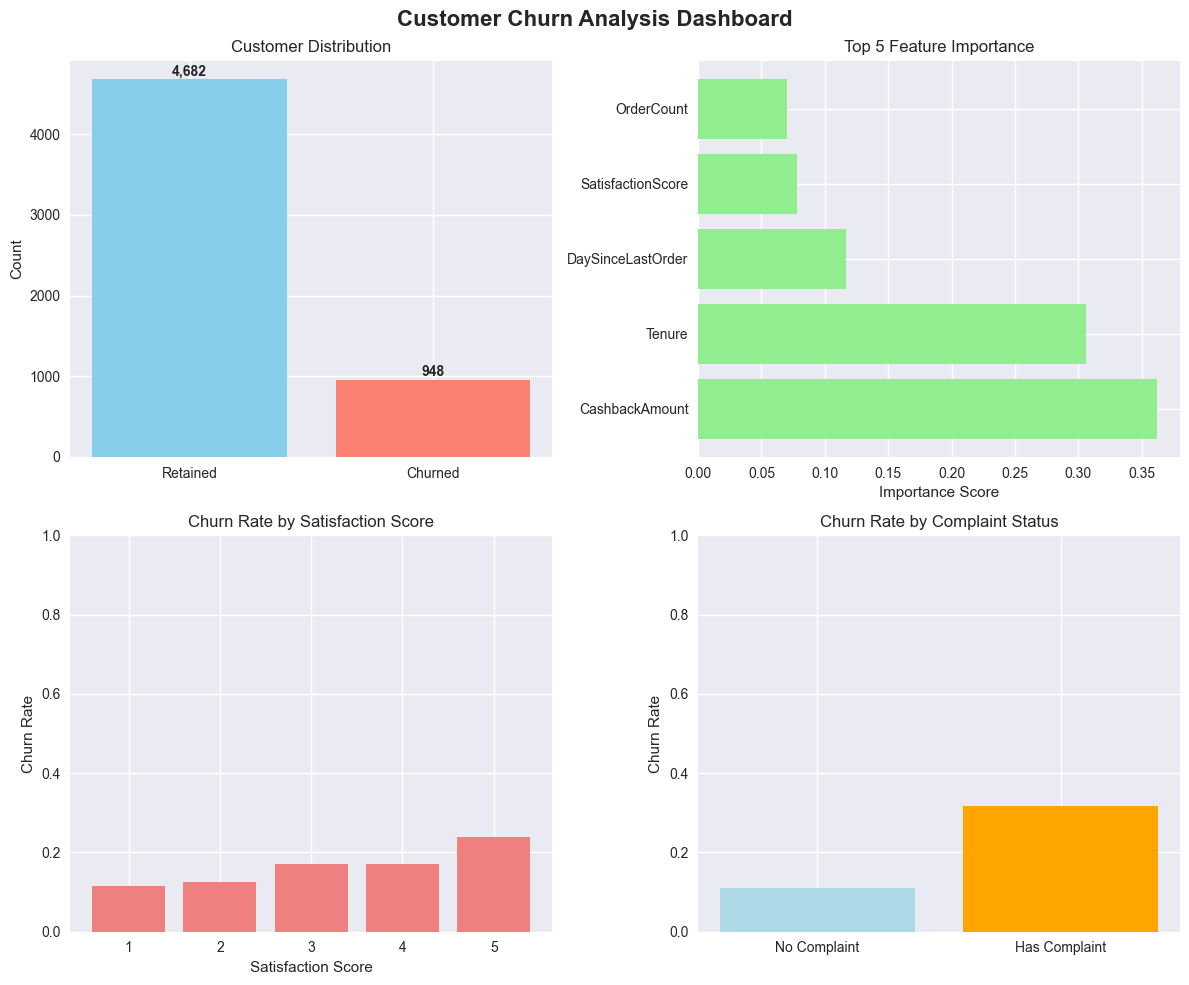

In [11]:
# Create clean, professional visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Customer Churn Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Target distribution
target_counts = df['target'].value_counts()
axes[0,0].bar(['Retained', 'Churned'], target_counts.values, color=['skyblue', 'salmon'])
axes[0,0].set_title('Customer Distribution')
axes[0,0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0,0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# 2. Feature importance
top_features = feature_importance.head(5)
axes[0,1].barh(top_features['feature'], top_features['importance'], color='lightgreen')
axes[0,1].set_title('Top 5 Feature Importance')
axes[0,1].set_xlabel('Importance Score')

# 3. Satisfaction vs Churn (if available)
if 'SatisfactionScore' in df.columns:
    satisfaction_churn = df.groupby('SatisfactionScore')['target'].mean()
    axes[1,0].bar(satisfaction_churn.index, satisfaction_churn.values, color='lightcoral')
    axes[1,0].set_title('Churn Rate by Satisfaction Score')
    axes[1,0].set_xlabel('Satisfaction Score')
    axes[1,0].set_ylabel('Churn Rate')
    axes[1,0].set_ylim(0, 1)

# 4. Model performance visualization
if 'Complain' in df.columns:
    complaint_data = ['No Complaint', 'Has Complaint']
    complaint_rates = [df[df['Complain']==0]['target'].mean(), 
                      df[df['Complain']==1]['target'].mean()]
    axes[1,1].bar(complaint_data, complaint_rates, color=['lightblue', 'orange'])
    axes[1,1].set_title('Churn Rate by Complaint Status')
    axes[1,1].set_ylabel('Churn Rate')
    axes[1,1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


Cell 12: Model Limitations and Recommendations

In [12]:
print("Model Assessment and Recommendations:")
print("=" * 40)

print("\n📊 Model Performance Summary:")
print(f"   Cross-validation AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
print(f"   Test AUC: {test_auc:.3f}")
print(f"   Performance level: {performance}")

print("\n⚠️  Important Limitations:")
print("   • Model shows correlation, not causation")
print("   • Performance may degrade over time without retraining")
print("   • Business context required for actionable strategies")
print("   • Results should be validated with domain experts")
print("   • Assumes historical patterns will continue")

print("\n🎯 Data-Driven Recommendations:")
print(f"   1. Investigate '{top_feature}' - strongest churn predictor")
if second_feature:
    print(f"   2. Monitor '{second_feature}' - second strongest predictor")
print("   3. Validate insights with business stakeholders")
print("   4. Consider A/B testing any intervention strategies")
print("   5. Collect additional customer behavior data if possible")
print("   6. Establish model performance monitoring system")

print("\n📋 Next Steps for Implementation:")
print("   • Set up model monitoring and retraining pipeline")
print("   • Develop business rules based on feature insights")
print("   • Create customer risk scoring system")
print("   • Plan controlled experiments for retention strategies")

print("\n⏰ Implementation Timeline:")
print("   • Week 1-2: Validate findings with business stakeholders")
print("   • Week 3-4: Design pilot retention program")
print("   • Month 2: Launch A/B test with control group")
print("   • Month 3: Evaluate program effectiveness and iterate")
print("   • Month 6: Full deployment with monitoring dashboard")

# Export key results
feature_importance.to_csv('churn_feature_importance.csv', index=False)
print(f"\n✅ Analysis complete. Feature importance exported to 'churn_feature_importance.csv'")

Model Assessment and Recommendations:

📊 Model Performance Summary:
   Cross-validation AUC: 0.948 ± 0.011
   Test AUC: 0.989
   Performance level: Strong predictive ability

⚠️  Important Limitations:
   • Model shows correlation, not causation
   • Performance may degrade over time without retraining
   • Business context required for actionable strategies
   • Results should be validated with domain experts
   • Assumes historical patterns will continue

🎯 Data-Driven Recommendations:
   1. Investigate 'CashbackAmount' - strongest churn predictor
   2. Monitor 'Tenure' - second strongest predictor
   3. Validate insights with business stakeholders
   4. Consider A/B testing any intervention strategies
   5. Collect additional customer behavior data if possible
   6. Establish model performance monitoring system

📋 Next Steps for Implementation:
   • Set up model monitoring and retraining pipeline
   • Develop business rules based on feature insights
   • Create customer risk scoring